In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE 

In [2]:
atlas = pd.read_csv('tsne_atlas.csv')

cells = atlas.pop('cell_line')
disease = atlas.pop("disease")
projects = atlas.pop('project_id')
values = atlas

In [5]:
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral']
cell_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        cell_colors.append(ll)
print(len(cell_colors))
print(len(np.unique(cells)))

import random
palettes = ['Paired', 'Set3', 'Dark2', 'Accent', 'Pastel1', 'Pastel2', 'Spectral', 'BrBG', 'PuOr', 'RdGy', 'Blues', 'Oranges', 'Purples', 'Reds', 'YlOrBr']
project_colors = []
for i in palettes:
    x = sns.color_palette(i)
    l = x.as_hex()
    for ll in l:
        project_colors.append(ll)
for r in random.sample(project_colors, 82):
    project_colors.append(r)

print(len(project_colors))
print(len(np.unique(projects)))

63
35
193
27


In [6]:
def tsne_plots(finalDF, perplexity):   
    c = len(np.unique(finalDF['cell_line']))
    pal = sns.color_palette("Spectral", n_colors=c)
    fig, ax=plt.subplots(figsize=(10,20))
    g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='cell_line', palette=cell_colors[:35])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set(title = f"cell_line plot; p = {perplexity}")
    print(g)

    c = len(np.unique(finalDF['project_id']))
    pal = sns.color_palette("Spectral", n_colors=c)
    fig, ax=plt.subplots(figsize=(10,20))
    g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='project_id', palette=project_colors[:27])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set(title = f"project_id plot; p = {perplexity}")
    print(g)

    c = len(np.unique(finalDF['disease']))
    pal = sns.color_palette("Spectral", n_colors=c)
    fig, ax=plt.subplots(figsize=(10,20))
    g = sns.scatterplot(data=finalDF, x='TSNE_1', y='TSNE_2', hue='disease', palette=project_colors[:c])
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    g.set(title = f"disease plot; p = {perplexity}")   
    print(g)

/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: 

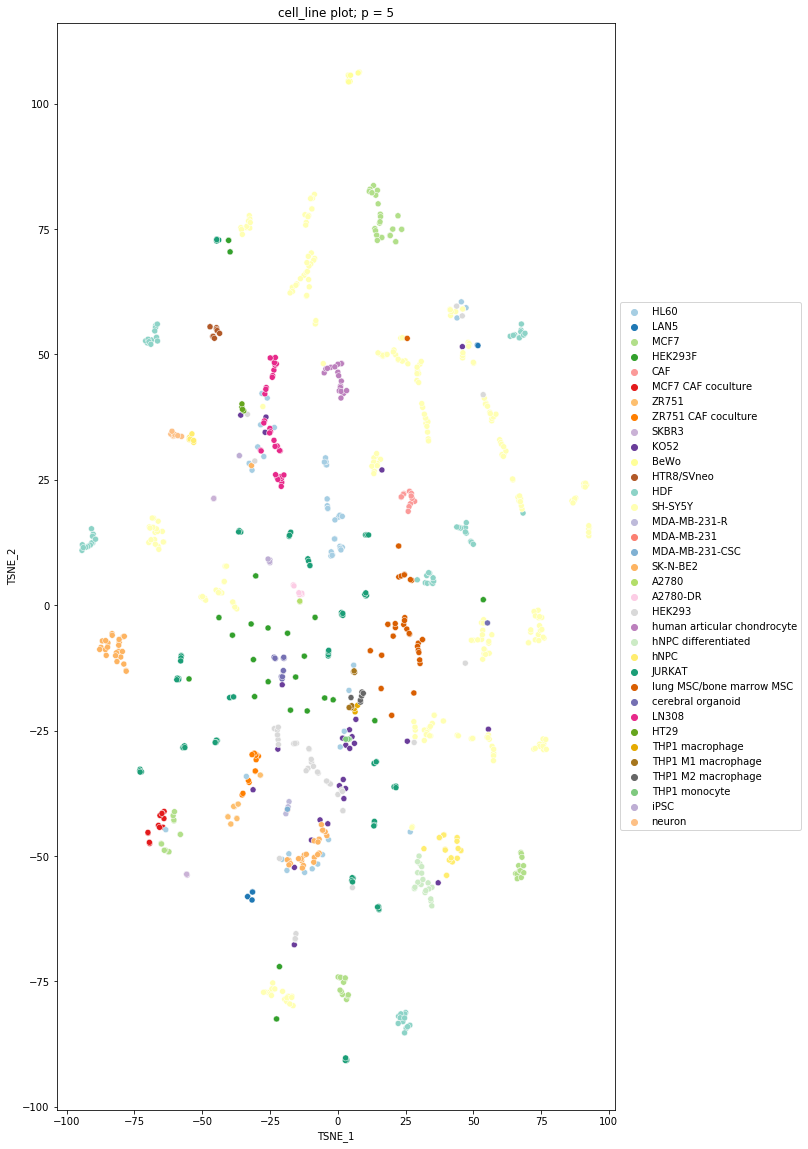

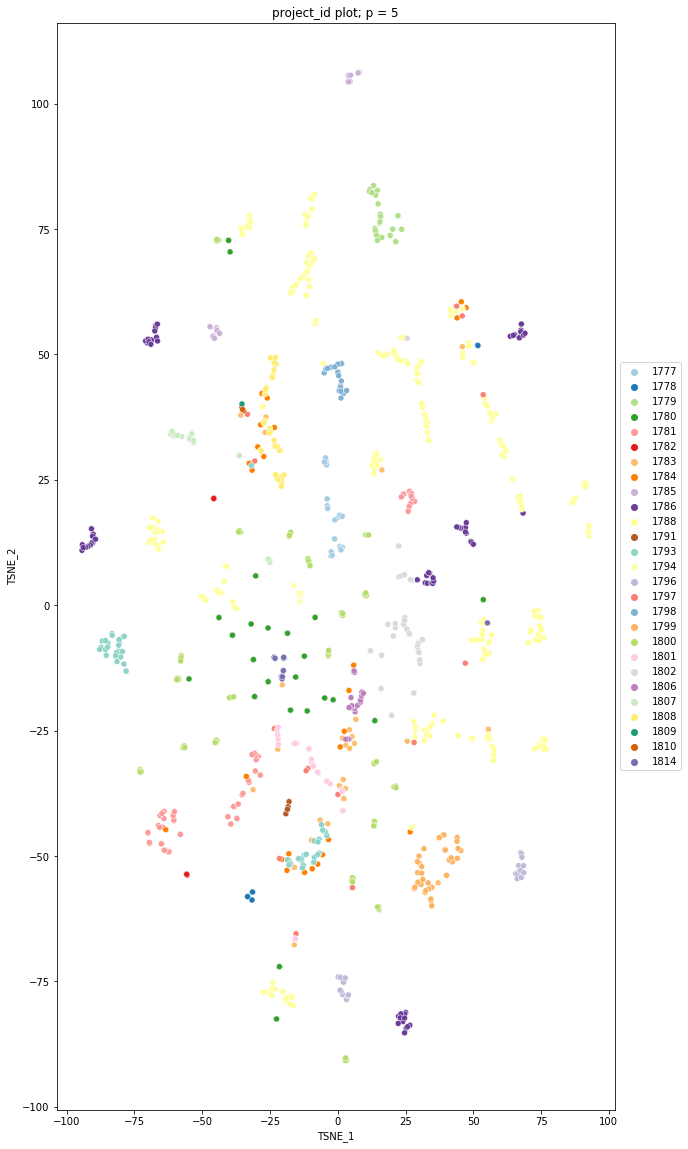

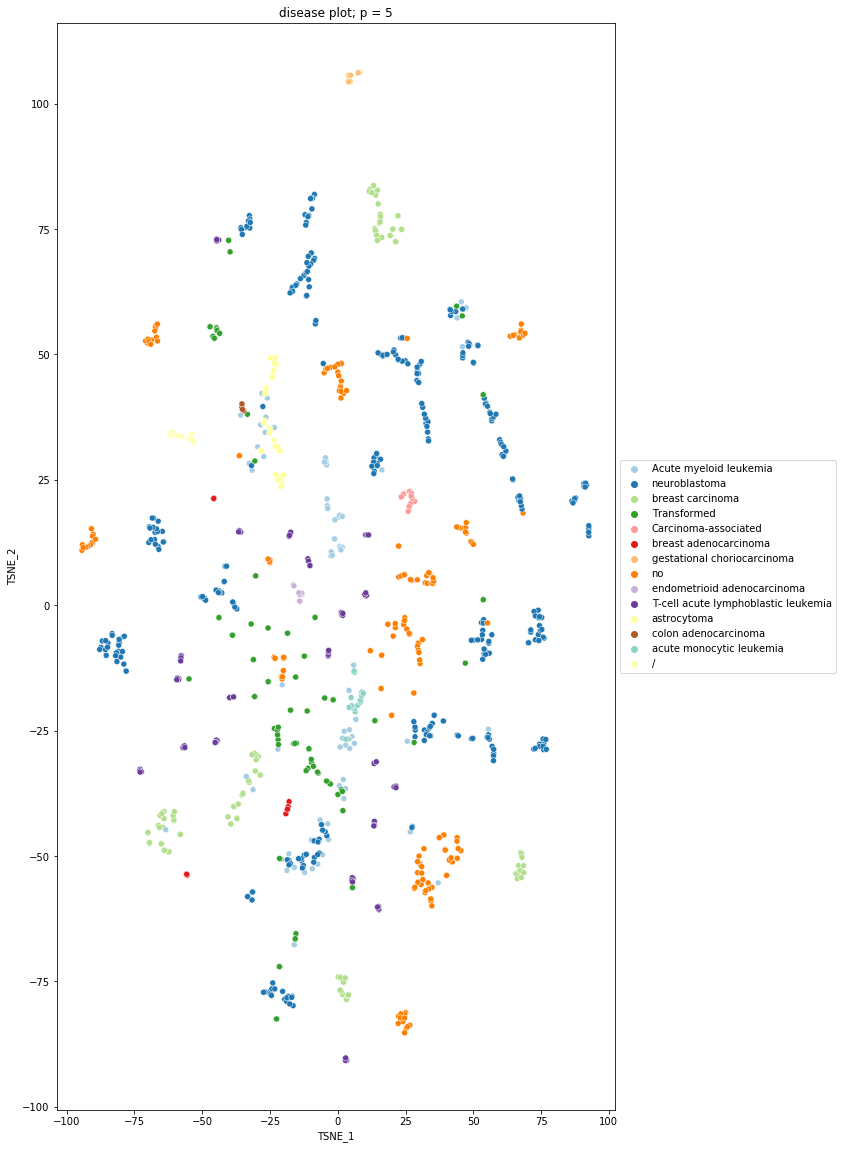

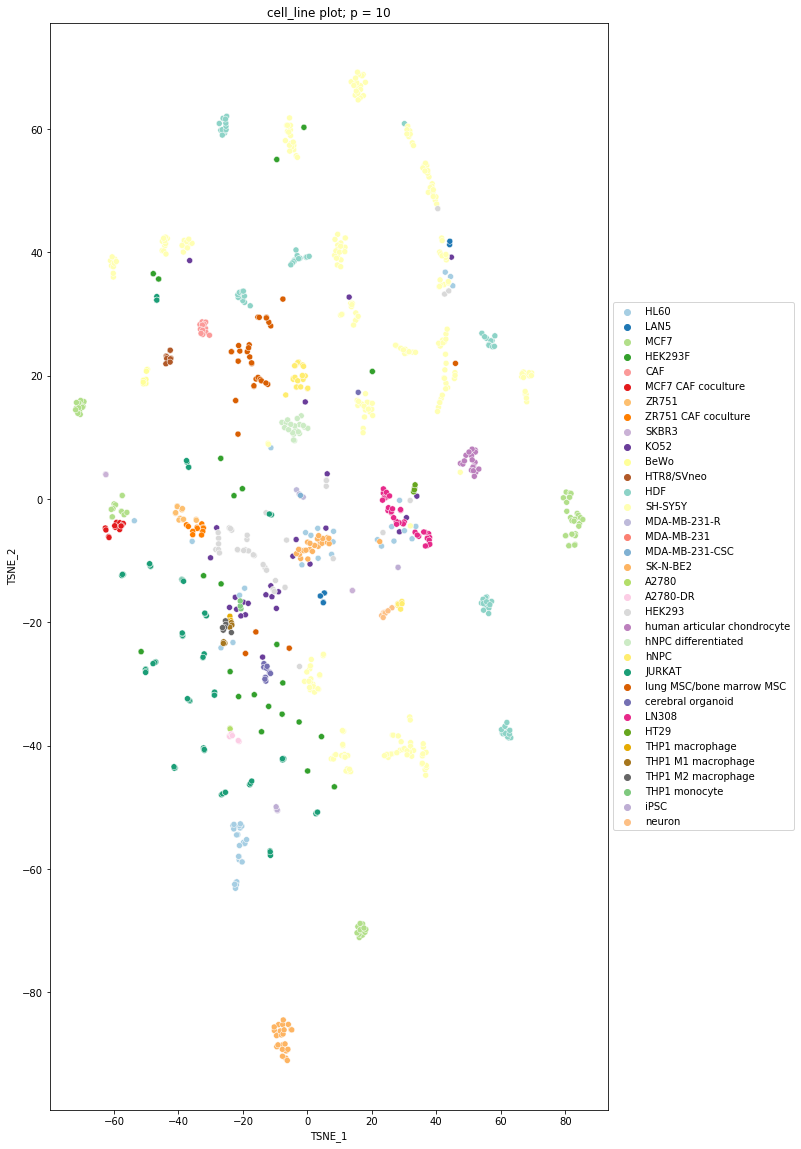

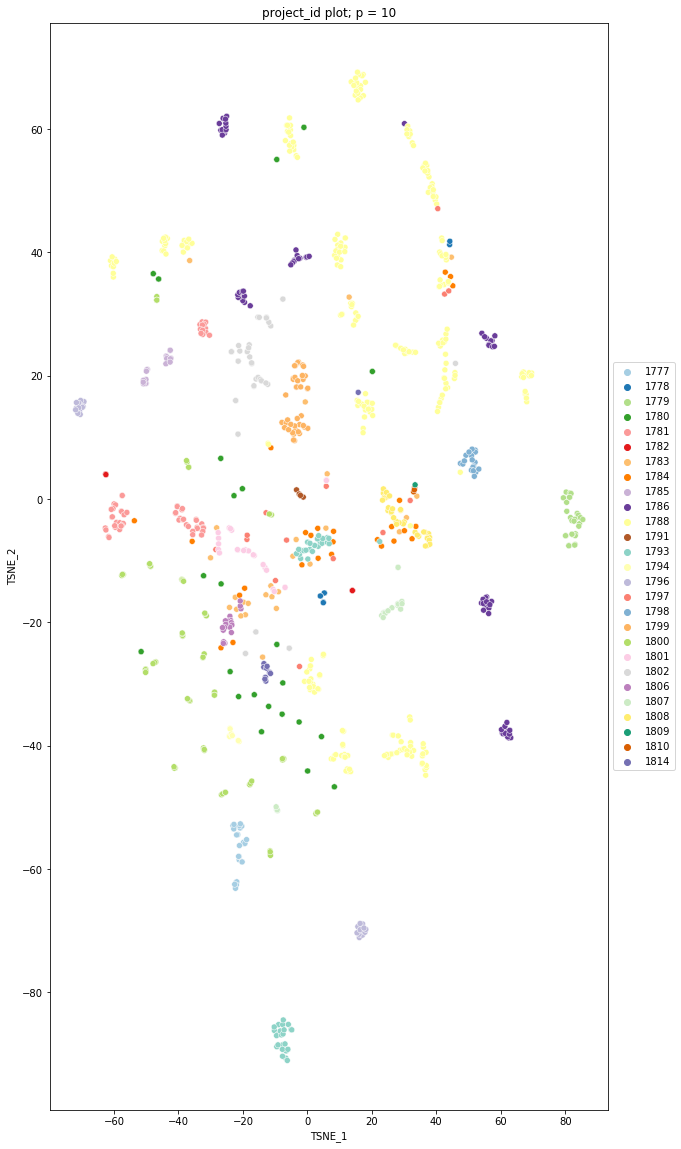

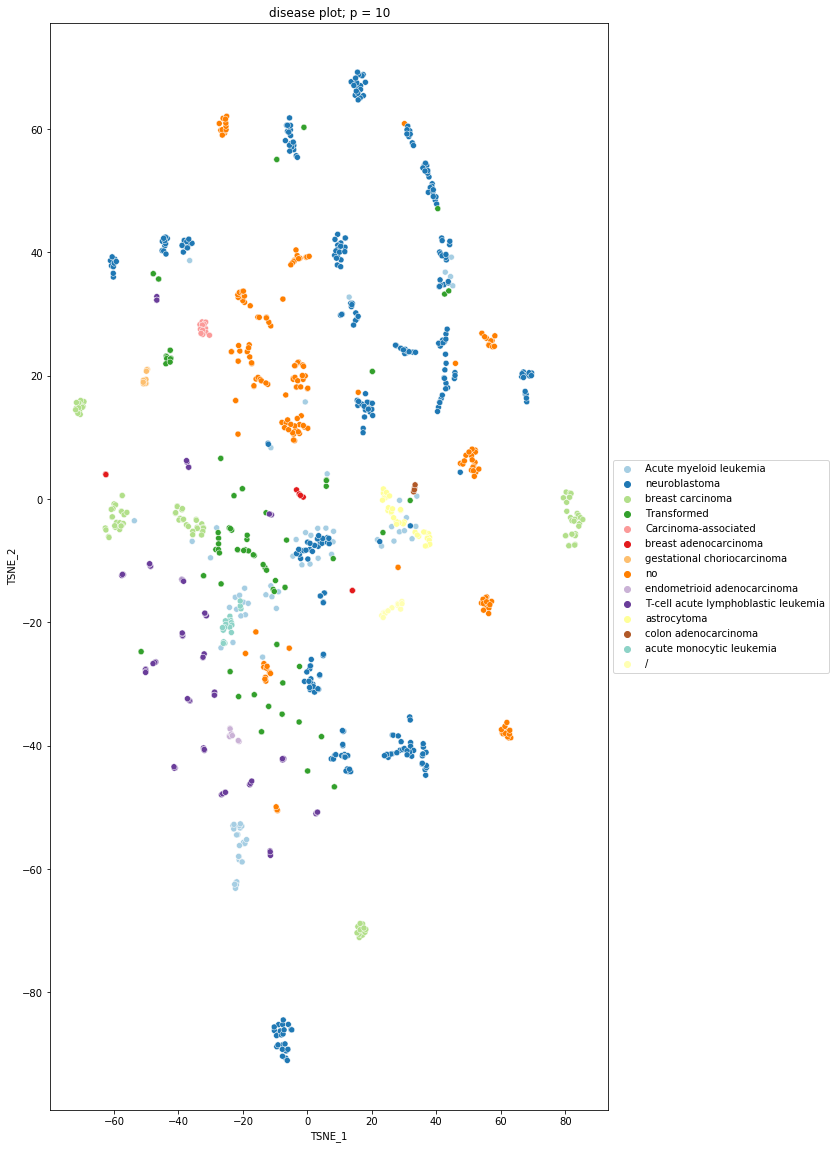

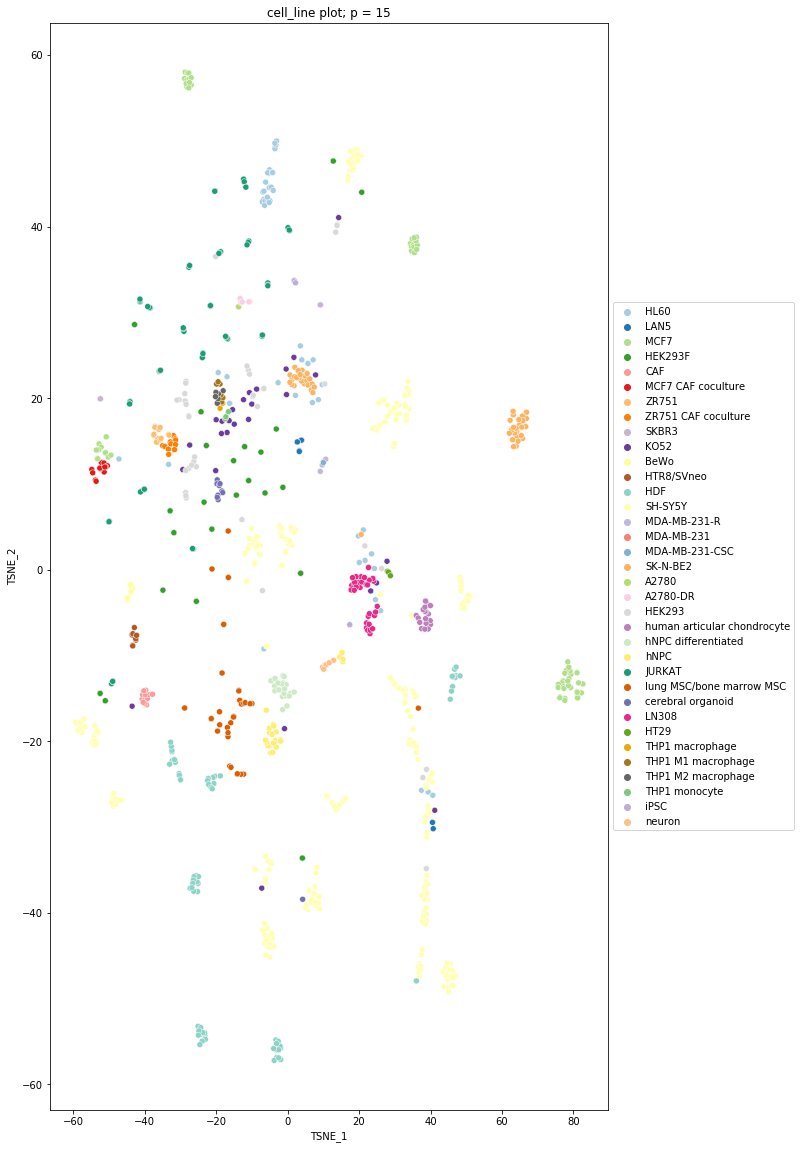

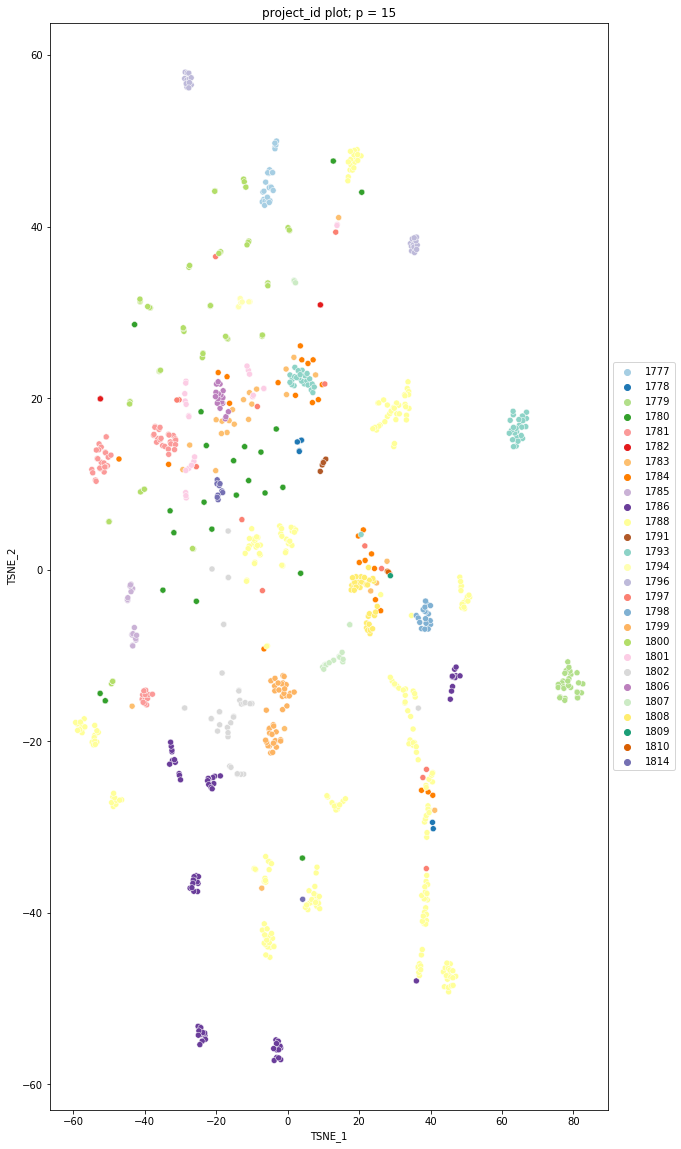

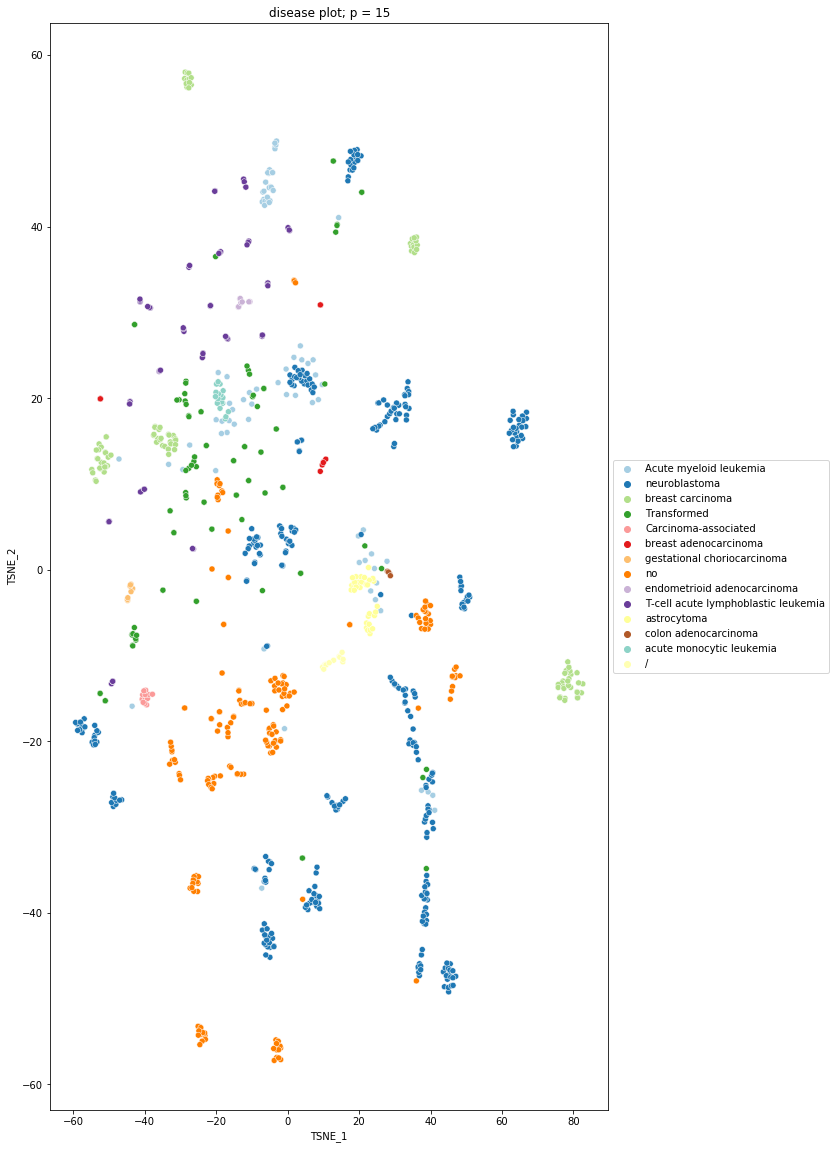

In [9]:
for p in range(5,75,5):


    tsne = TSNE(n_components = 2, perplexity = p)
    tsne_results = tsne.fit_transform(values)
    principalDf = pd.DataFrame(data = tsne_results, columns = ['TSNE_1', 'TSNE_2'])
    
    finalDF = pd.concat([principalDf, cells, projects, disease], axis = 1)
    
    tsne_plots(finalDF, p)